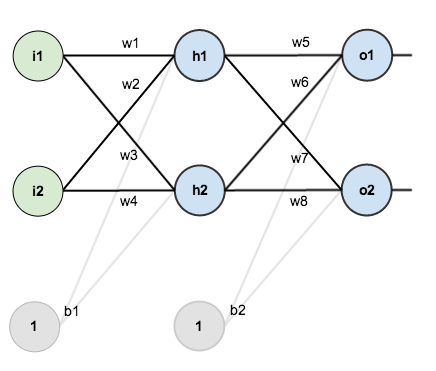
以这个图片为例，推导反向传播

# 前向传播

其中$i_1$，$i_2$为输入

对于节点$h_1$来说，净输入$net_{h1}$如下：

$$net_{h_1}=w_1 \times i_1 + w_2 \times i_2 + b_1 \times 1$$

接着对$net_{h_1}$做一个sigmoid函数，得到节点$h_1$的最终输出：

$$out_{h_1}=\frac{1}{1+e^{-net_{h_1}}}$$

类似的还有$h_2$对应的$net_{h_2}$，$out_{h_2}$，$o_1$对应的$net_{o_1}$，$out_{o_1}$，$o_2$对应的$net_{o_2}$，$out_{o_2}$

$$net_{h_2}=w_3 \times i_1 + w_4 \times i_2 + b_1 \times 1$$

$$out_{h_2}=\frac{1}{1+e^{-net_{h_2}}}$$

$$net_{o_1}=w_5 \times out_{h_1} + w_6 \times out_{h_2} + b_2 \times 1$$

$$out_{o_1}=\frac{1}{1+e^{-net_{o_1}}}$$

$$net_{o_2}=w_7 \times out_{h_1} + w_8 \times out_{h_2} + b_2 \times 1$$

$$out_{o_2}=\frac{1}{1+e^{-net_{o_2}}}$$

# 误差、损失函数

根据上述定义，整个神经网络的输出误差可以表示为：

$$E_{total}=\Sigma \frac{1}{2} (target - output) ^2$$

其中$output$是前向传播计算出来的结果$out_{o_1}$、$out_{o_2}$，$target$是节点$o_1$、$o_2$的目标值

$E_{total}$省略了防止过拟合的正则项

代入具体项后展开得到：

$$E_{total} = E_{o_1} + E_{o_2} = \frac{1}{2} (target_{o_1} - out_{o_1})^2 + \frac{1}{2} (target_{o_2} - out_{o_2})^2$$

# 反向传播

## 对输出层的$w_5$

通过梯度下降调整$w_5$，需要求出$\frac{\partial E_{total}}{\partial w_5}$，根据链式求导法则：

$$\frac{\partial E_{total}}{\partial w_5} = \frac{\partial E_{total}}{\partial out_{o_1}} \times \frac{\partial out_{o_1}}{\partial net_{o_1}} \times \frac{\partial net_{o_1}}{\partial w_5}$$

如下图所示：
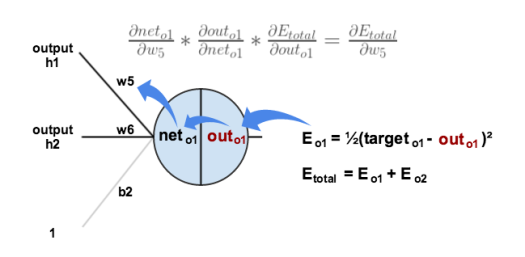

$$\frac{\partial E_{total}}{\partial out_{o_1}} = \frac{\partial}{\partial out_{o_1}} ( \frac{1}{2} (target_{o_1} - out_{o_1}) ^ 2 + \frac{1}{2} (target_{o_2} - out_{o_2}) ^ 2) = - (target_{o_1} - out_{o_1})$$

$$\frac{\partial out_{o_1}}{\partial net_{o_1}} = \frac{\partial}{\partial net_{o_1}} \frac{1}{1+e^{-net_{o_1}}} = out_{o_1}(1-out_{o_1})$$

$$\frac{\partial net_{o_1}}{\partial w_5} = \frac{\partial}{\partial w_5} (w_5 \times out_{h_1} + w_6 \times out_{h_2} + b_2 \times 1) = out_{h_1}$$

以上3个相乘就是$E_{totla}$对$w_5$的梯度，就可以用来训练了：

$$w_5^+ = w_5 - \eta \frac{\partial E_{total}}{\partial w_5}$$

把中间结果$\frac{\partial E_{total}}{\partial net_{o_1}} = \frac{\partial E_{total}}{\partial out_{o_1}} \times \frac{\partial out_{o_1}}{\partial net_{o_1}}$记为$\delta_{o_1}$，表示这个节点对最终的误差需要负多少责任，也是这个节点的输入对结果产生的影响，所以有$\frac{\partial E_{total}}{\partial w_5} = \delta_{o_1} \times out_{h_1}$

## 对隐藏层$w_1$

通过梯度下降调整$w_1$，需要求出$\frac{\partial E_{total}}{\partial w_1}$，根据链式求导法则：

$$\frac{\partial E_{total}}{\partial w_1} = \frac{\partial E_{total}}{\partial out_{h_1}} \times \frac{\partial out_{h_1}}{\partial net_{h_1}} \times \frac{\partial net_{h_1}}{\partial w_1}$$

如下图所示：

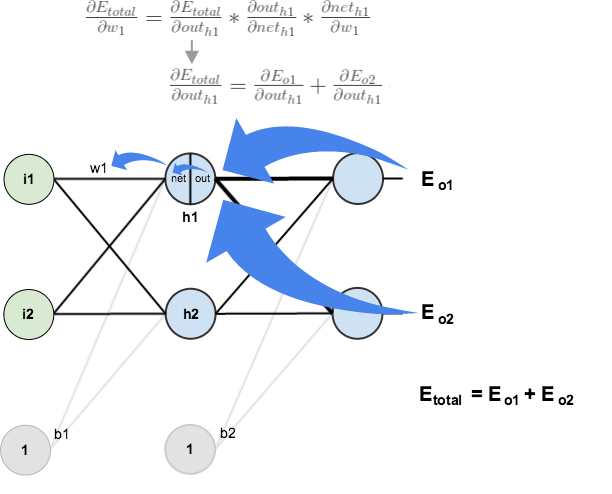

参数$w_1$影响了$net_{h_1}$，进而影响了$out_{h_1}$，最终影响了$E_{o_1}$、$E_{o_2}$

求解每个部分：

$$\frac{\partial E_{total}}{\partial out_{h_1}} = \frac{\partial E_{o_1}}{\partial out_{h_1}} + \frac{\partial E_{o_2}}{\partial out_{h_1}}$$

$$\frac{\partial E_{o_1}}{\partial out_{h_1}} = \frac{\partial E_{o_1}}{\partial net_{o_1}} \times \frac{\partial net_{o_1}}{\partial out_{h_1}} = \delta_{o_1} \times \frac{\partial}{\partial out_{h_2}}(w_5 \times out_{h_1} + w_6 \times out_{h_2} + b_2 \times 1) = \delta_{o_1} \times w_5$$

同理可得$\frac{\partial E_{o_2}}{\partial out_{h_1}} = \delta_{o_1} \times w_7$，两式相加：

$$\frac{\partial E_{total}}{\partial out_{h_1}} = \delta_{o_1} \times w_5 + \delta_{o_1} \times w_7$$

$$\frac{\partial out_{h_1}}{\partial net_{h_1}} = out_{h_1}(1-out_{h_1})$$

$$\frac{\partial net_{h_1}}{\partial w_1} = \frac{\partial}{\partial w_1}(w_1 \times i_1 + w_2 \times i_2 + b_1 \times 1) = i_1$$

相乘得到：

$$\frac{\partial E_{total}}{\partial w_1} = (\delta_{o_1} w_5 + \delta_{o_1} w_7) \times out_{h_1}(1-out_{h_1}) \times i_1$$

得到梯度后，就可以对$w_1$进行迭代：

$$w_1^+ = w_1 - \eta \frac{\partial E_{total}}{\partial w_1}$$

同样也可以和上面进行类似的定义：

$$\delta_{h_1} = \frac{\partial E_{total}}{\partial out_{h_1}} \frac{\partial out_{h_1}}{\partial net_{h_1}} = (\delta_{o_1} w_5 + \delta_{o_1} w_7) \times out_{h_1}(1-out_{h_1}) = \sum_j \delta_{o_j} w_{h_{o_j}} \times out_{h_1}(1-out_{h_1})$$

所以对于$w_1$的梯度可以写成：

$$\frac{\partial E_{total}}{\partial w_1} = \delta_{h_1} \times i_1$$

# 代码实现

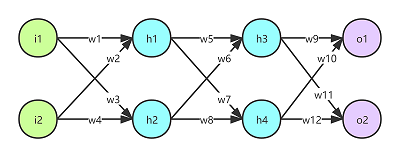

该代码实现忽略bias，简化代码模型

最后一层的输出没有sigmoid激活函数，可以理解为激活函数为本身，即$out_{o_1} = net_{o_1}$

In [53]:
import torch
import math

In [55]:
inputs = torch.tensor([[1], [2]], dtype=torch.float32)
outputs = torch.tensor([[10], [20]], dtype=torch.float32)

layer1_param = torch.randn((2, 2), dtype=torch.float32)
layer2_param = torch.randn((2, 2), dtype=torch.float32)
layer3_param = torch.randn((2, 2), dtype=torch.float32)

lr = 1e-2
for step in range(1000):
    # 前向传播
    hl1 = torch.sigmoid(layer1_param.matmul(inputs))
    hl2 = torch.sigmoid(layer2_param.matmul(hl1))
    o = torch.matmul(layer3_param, hl2)
    # 计算损失值
    loss = torch.sum(torch.pow(outputs - o, 2))
    print("output=%s step=%d loss=%f" % (o.view(2,), step, loss.item()))

    # 反向传播
    delta_o = o - outputs
    delta_hl2 = layer2_param.transpose(0, 1).matmul(delta_o) * hl2 * (1 - hl2)
    delta_hl1 = layer1_param.transpose(0,
                                       1).matmul(delta_hl2) * hl1 * (1 - hl1)
    layer3_param = layer3_param - lr * delta_o.matmul(hl2.transpose(0, 1))
    layer2_param = layer2_param - lr * delta_hl2.matmul(hl1.transpose(0, 1))
    layer1_param = layer1_param - lr * delta_hl1.matmul(inputs.transpose(0, 1))

output=tensor([1.0609, 0.7132]) step=0 loss=451.889648
output=tensor([1.1406, 0.8608]) step=1 loss=444.796509
output=tensor([1.2214, 1.0125]) step=2 loss=437.589417
output=tensor([1.3030, 1.1678]) step=3 loss=430.291504
output=tensor([1.3852, 1.3262]) step=4 loss=422.924713
output=tensor([1.4680, 1.4875]) step=5 loss=415.509247
output=tensor([1.5512, 1.6511]) step=6 loss=408.063477
output=tensor([1.6347, 1.8169]) step=7 loss=400.603516
output=tensor([1.7185, 1.9844]) step=8 loss=393.143646
output=tensor([1.8025, 2.1535]) step=9 loss=385.696106
output=tensor([1.8866, 2.3239]) step=10 loss=378.271149
output=tensor([1.9708, 2.4955]) step=11 loss=370.877533
output=tensor([2.0550, 2.6680]) step=12 loss=363.522522
output=tensor([2.1393, 2.8413]) step=13 loss=356.211823
output=tensor([2.2236, 3.0154]) step=14 loss=348.950317
output=tensor([2.3080, 3.1901]) step=15 loss=341.741394
output=tensor([2.3923, 3.3654]) step=16 loss=334.587860
output=tensor([2.4768, 3.5412]) step=17 loss=327.491699
ou

output=tensor([ 9.9017, 19.7703]) step=241 loss=0.062451
output=tensor([ 9.9036, 19.7748]) step=242 loss=0.059998
output=tensor([ 9.9056, 19.7793]) step=243 loss=0.057642
output=tensor([ 9.9074, 19.7836]) step=244 loss=0.055379
output=tensor([ 9.9093, 19.7879]) step=245 loss=0.053204
output=tensor([ 9.9111, 19.7921]) step=246 loss=0.051114
output=tensor([ 9.9129, 19.7962]) step=247 loss=0.049108
output=tensor([ 9.9146, 19.8003]) step=248 loss=0.047179
output=tensor([ 9.9163, 19.8042]) step=249 loss=0.045328
output=tensor([ 9.9180, 19.8081]) step=250 loss=0.043547
output=tensor([ 9.9196, 19.8119]) step=251 loss=0.041837
output=tensor([ 9.9212, 19.8156]) step=252 loss=0.040195
output=tensor([ 9.9228, 19.8193]) step=253 loss=0.038617
output=tensor([ 9.9244, 19.8229]) step=254 loss=0.037100
output=tensor([ 9.9259, 19.8264]) step=255 loss=0.035643
output=tensor([ 9.9274, 19.8298]) step=256 loss=0.034244
output=tensor([ 9.9288, 19.8332]) step=257 loss=0.032899
output=tensor([ 9.9302, 19.8365

output=tensor([ 9.9996, 19.9989]) step=508 loss=0.000001
output=tensor([ 9.9996, 19.9989]) step=509 loss=0.000001
output=tensor([ 9.9996, 19.9989]) step=510 loss=0.000001
output=tensor([ 9.9996, 19.9990]) step=511 loss=0.000001
output=tensor([ 9.9996, 19.9990]) step=512 loss=0.000001
output=tensor([ 9.9996, 19.9990]) step=513 loss=0.000001
output=tensor([ 9.9996, 19.9990]) step=514 loss=0.000001
output=tensor([ 9.9996, 19.9990]) step=515 loss=0.000001
output=tensor([ 9.9996, 19.9991]) step=516 loss=0.000001
output=tensor([ 9.9996, 19.9991]) step=517 loss=0.000001
output=tensor([ 9.9996, 19.9991]) step=518 loss=0.000001
output=tensor([ 9.9996, 19.9991]) step=519 loss=0.000001
output=tensor([ 9.9997, 19.9991]) step=520 loss=0.000001
output=tensor([ 9.9997, 19.9991]) step=521 loss=0.000001
output=tensor([ 9.9997, 19.9992]) step=522 loss=0.000001
output=tensor([ 9.9997, 19.9992]) step=523 loss=0.000001
output=tensor([ 9.9997, 19.9992]) step=524 loss=0.000001
output=tensor([ 9.9997, 19.9992

output=tensor([10.0000, 20.0000]) step=779 loss=0.000000
output=tensor([10.0000, 20.0000]) step=780 loss=0.000000
output=tensor([10.0000, 20.0000]) step=781 loss=0.000000
output=tensor([10.0000, 20.0000]) step=782 loss=0.000000
output=tensor([10.0000, 20.0000]) step=783 loss=0.000000
output=tensor([10.0000, 20.0000]) step=784 loss=0.000000
output=tensor([10.0000, 20.0000]) step=785 loss=0.000000
output=tensor([10.0000, 20.0000]) step=786 loss=0.000000
output=tensor([10.0000, 20.0000]) step=787 loss=0.000000
output=tensor([10.0000, 20.0000]) step=788 loss=0.000000
output=tensor([10.0000, 20.0000]) step=789 loss=0.000000
output=tensor([10.0000, 20.0000]) step=790 loss=0.000000
output=tensor([10.0000, 20.0000]) step=791 loss=0.000000
output=tensor([10.0000, 20.0000]) step=792 loss=0.000000
output=tensor([10.0000, 20.0000]) step=793 loss=0.000000
output=tensor([10.0000, 20.0000]) step=794 loss=0.000000
output=tensor([10.0000, 20.0000]) step=795 loss=0.000000
output=tensor([10.0000, 20.0000